Mean Squared Error: 28017456354.220364
R-squared Score: %79.38
Cross-Validation Mean Squared Error: 69405461714.98964


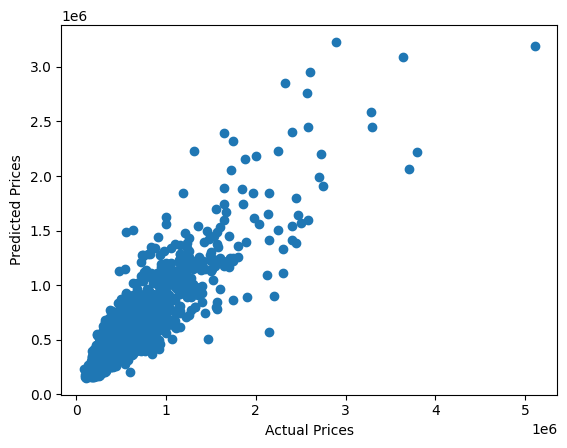

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


feature_with_outliers_living_area = 'living area'

df = pd.read_csv("./HousePriceIndia.csv")
df.head()
# Drop unnecessary columns
# df = df.drop(['id', 'Date'], axis=1) 
# Convert 'number of bedrooms' to int
df['number of bedrooms'] = df['number of bedrooms'].astype(int)
df['number of floors'] = df['number of floors'].astype(int)
# Convert 'water front present' from float to int
df['waterfront present'] = df['waterfront present'].astype(int)


# Handling missing values if any
df = df.dropna()


# Extract features (X) and target variable (y)
X = df.drop(['id', 'Date','Price', 'Postal Code', 'Area of the basement',
            'Area of the house'], axis=1)
y = df['Price']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create KNN regressor model
# You can adjust the number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
# Train the model
knn_model.fit(X_train_scaled, y_train)
# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: %{r2*100:.2f}")

# Cross-validation to assess model performance
cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()

print(f"Cross-Validation Mean Squared Error: {cv_mse}")

# get accuracy plot

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()


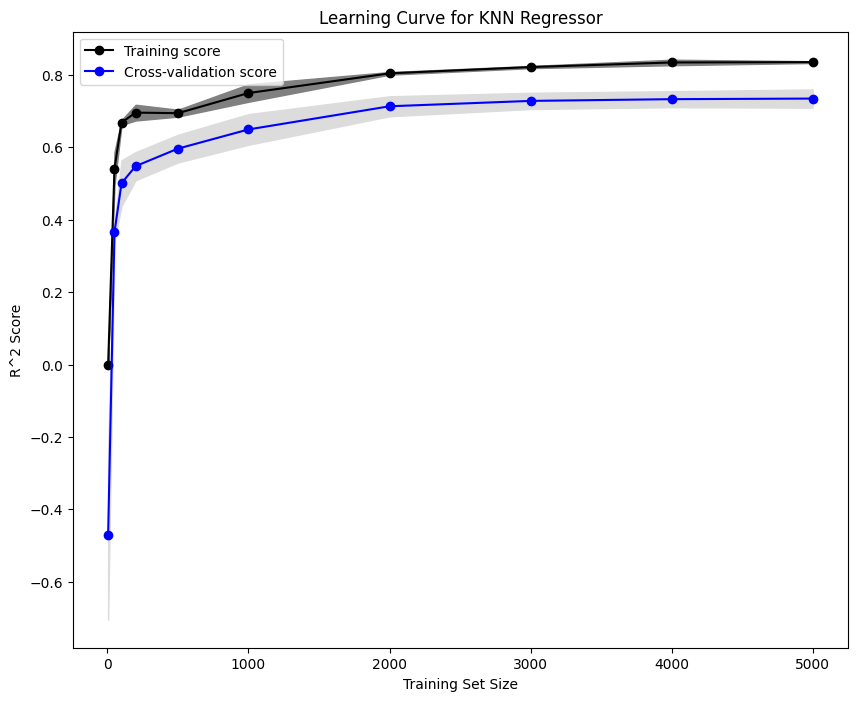

In [8]:
from sklearn.model_selection import learning_curve
import numpy as np
# Define training set sizes
# Define training set sizes
train_sizes = [5, 50, 100, 200, 500, 1000, 2000, 3000, 4000, 5000]

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(knn_model, X_train_scaled, y_train, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 8))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="gainsboro")
plt.plot(train_sizes, train_mean, 'o-', color="black", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="blue", label="Cross-validation score")
plt.title("Learning Curve for KNN Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("R^2 Score")
plt.legend(loc="best")
plt.show()

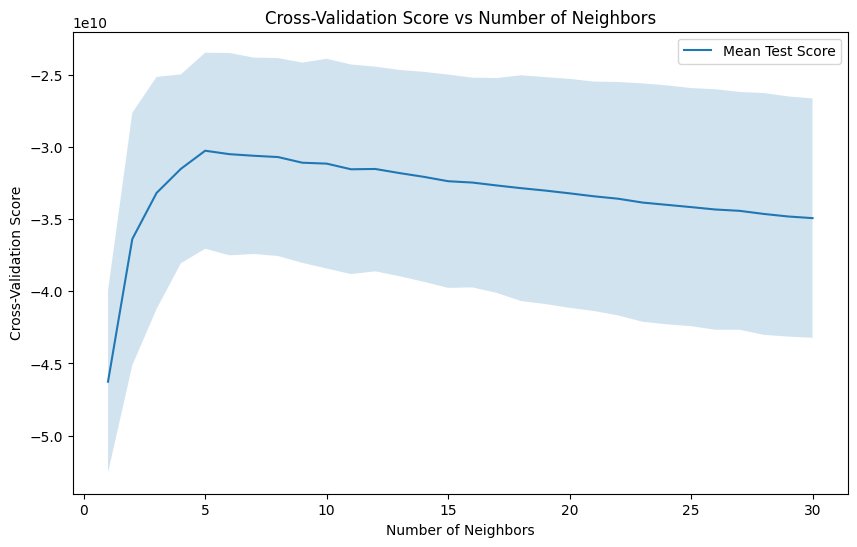

In [11]:
import matplotlib.pyplot as plt

# Get mean test scores
mean_test_scores = grid.cv_results_['mean_test_score']

# Get standard deviation of test scores
std_test_scores = grid.cv_results_['std_test_score']

# Get the parameter list
param_list = list(range(1, 31))

# Plot mean test scores
plt.figure(figsize=(10, 6))
plt.plot(param_list, mean_test_scores, label='Mean Test Score')

# Plot the standard deviation of the test scores
plt.fill_between(param_list, mean_test_scores - std_test_scores, mean_test_scores + std_test_scores, alpha=0.2)

plt.title('Cross-Validation Score vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross-Validation Score')
plt.legend()
plt.show()